In [4]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('fashion-mnist_train.csv')
df1 = pd.read_csv('fashion-mnist_test.csv')

In [6]:
df1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = df.columns[1:]
cols1 = df1.columns[1:]

In [8]:
x_train = df.as_matrix(columns=cols).reshape(len(df),28,28,1)
x_test = df1.as_matrix(columns=cols1).reshape(len(df1),28,28,1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train /= 255.0
x_test /= 255.0

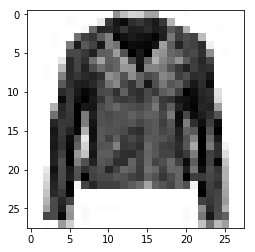

In [11]:
plt.imshow(x_train[23].reshape((28,28)),cmap='binary')

In [12]:
y_train = np.array(df['label'])
y_test = np.array(df1['label'])

In [13]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [15]:
model = Sequential()

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(100,activation=tf.nn.relu))
model.add(Dense(100,activation=tf.nn.relu))

In [18]:
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.4993 - acc: 0.8209
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3749 - acc: 0.8639
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.3409 - acc: 0.8761
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3176 - acc: 0.8839
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2991 - acc: 0.8899
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2850 - acc: 0.8939
Epoch 7/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2721 - acc: 0.8976
Epoch 8/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.2626 - acc: 0.9020
Epoch 9/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.2519 - acc: 0.9045
Epoch 10/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.2430 - 

In [27]:
predictions = model.predict(x_test)

In [30]:
predictions_f = []
for pred in predictions:
    predictions_f.append(pred.argmax())

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

You can see from the classification report and overall accuracy of 88%. It is also apparent though, that our network performed relatively poorly on class 6, labelled shirt, which is bringing down the average.

In [34]:
print(classification_report(predictions_f,y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       949
           1       0.99      0.98      0.99      1004
           2       0.71      0.90      0.80       787
           3       0.91      0.91      0.91      1003
           4       0.85      0.81      0.83      1057
           5       0.95      0.98      0.96       969
           6       0.76      0.64      0.69      1196
           7       0.95      0.92      0.94      1035
           8       0.97      0.97      0.97      1006
           9       0.95      0.96      0.95       994

    accuracy                           0.88     10000
   macro avg       0.88      0.89      0.89     10000
weighted avg       0.89      0.88      0.88     10000



In [57]:
def index_to_class(index):
    if index == 0:
        clss = 'T-shirt/top'
    if index == 1:
        clss = 'Trouser'
    if index == 2:
        clss = 'Pullover'
    if index == 3:
        clss = 'Dress'
    if index == 4:
        clss = 'Coat'
    if index == 5:
        clss = 'Sandal'
    if index == 6:
        clss = 'Shirt'
    if index == 7:
        clss = 'Sneaker'
    if index == 8: 
        clss = 'Bag'
    if index == 9: 
        clss = 'Ankle boot'
    return clss

In [112]:
test_index = 23

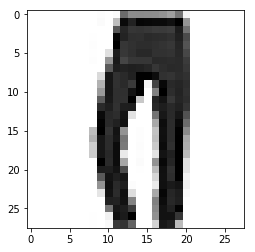

In [113]:
plt.imshow(x_test[test_index].reshape(28, 28),cmap='Greys')

In [114]:
pred = model.predict(x_test[test_index].reshape(1, 28, 28, 1))
index_to_class(pred.argmax())
print('The image is: {}'.format(index_to_class(pred.argmax())))

The image is: Trouser
